## Installing ktrain

In [ ]:
!pip install ktrain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 79.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=8a7a232a66d9d645e3c86133c0b923896075f6c181e7e1f9fb15000d2cdf3189
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

## Importing Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

## Clone Git Repository for Data

In [ ]:
## Will need this if data is available on GitHub
# !git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


## Data Preparation

In [ ]:
## loading the train dataset
## change the path if necessary
data = pd.read_csv('/content/test.csv', dtype= str)[['reviews','rating']]
data = data.rename(columns={'reviews':'Reviews', 'rating':'Sentiment'})
data.head()

,Reviews,Sentiment
0,生成一个现代风格的高层写字楼外观设计图,picture
1,设计一个未来主义风格的城市景观图，包含高速铁路和独特建筑,picture
2,展示一个欧洲小镇风格的街景设计，包括石砌街道和彩色房屋,picture
3,设计一个科幻城市的空中港口，有飞行汽车和高科技建筑,picture
4,生成一个大楼概念设计图,picture


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.1)


In [ ]:
## dimension of the dataset

print("Size of train dataset: ",data_train.shape)
print("Size of test dataset: ",data_test.shape)

#printing last rows of train dataset
data_train.tail()

#printing head rows of test dataset
data_test.head()

Size of train dataset:  (1325, 2)
Size of test dataset:  (148, 2)


,Reviews,Sentiment
838,探讨建筑中的“文化遗产保护”与现代城市发展,text
197,创造一个与龙共存的奇幻城市景象,picture
1468,生成一张建筑体量与比例的设计分析图,picture
1440,生成一张建筑空间氛围的感知模拟图,picture
939,解释建筑中的“建筑能效评价标准”,text


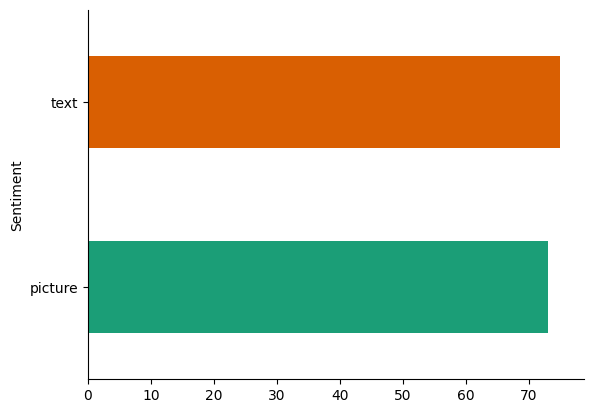

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
data_test.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Train-Test Split

Models supported by transformers library for tensorflow 2:

- **BERT**: bert-base-uncased, bert-large-uncased,bert-base-multilingual-uncased, and others.
- **DistilBERT**: distilbert-base-uncased distilbert-base-multilingual-cased, distilbert-base-german-cased, and others
- **ALBERT**: albert-base-v2, albert-large-v2, and others
- **RoBERTa**: roberta-base, roberta-large, roberta-large-mnli
- **XLM**: xlm-mlm-xnli15–1024, xlm-mlm-100–1280, and others
- **XLNet**: xlnet-base-cased, xlnet-large-cased


In [ ]:
# text.texts_from_df return two tuples
# maxlen means it is considering that much words and rest are getting trucated
# preprocess_mode means tokenizing, embedding and transformation of text corpus(here it is considering BERT model)


(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'Reviews',
                                                                   label_columns = 'Sentiment',
                                                                   val_df = data_test,
                                                                   maxlen = 250,
                                                                   lang = 'zh-*',
                                                                   preprocess_mode = 'bert') # or distilbert

['picture', 'text', nan]
     picture  text  NaN
799      0.0   1.0  0.0
157      1.0   0.0  0.0
202      1.0   0.0  0.0
552      0.0   1.0  0.0
709      0.0   1.0  0.0
['picture', 'text', nan]
      picture  text  NaN
838       0.0   1.0  0.0
197       1.0   0.0  0.0
1468      1.0   0.0  0.0
1440      1.0   0.0  0.0
939       0.0   1.0  0.0
downloading pretrained BERT model (chinese_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: zh-*


Is Multi-Label? False
preprocessing test...
language: zh-*


In [ ]:
## size of data
print(X_train[0].shape, y_train.shape)
print(X_test[0].shape, y_test.shape)

(1325, 250) (1325, 3)
(148, 250) (148, 3)


## Define Model

In [ ]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', # or distilbert
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 250


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


## Define Learner

In [ ]:
#here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

## Estimate Learning Rate (Optional)


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
221/221 [==============================] - 58s 175ms/step - loss: 0.3995 - accuracy: 0.8347
Epoch 2/2
221/221 [==============================] - 22s 100ms/step - loss: 3.0583 - accuracy: 0.5027


done.
Visually inspect loss plot and select learning rate associated with falling loss


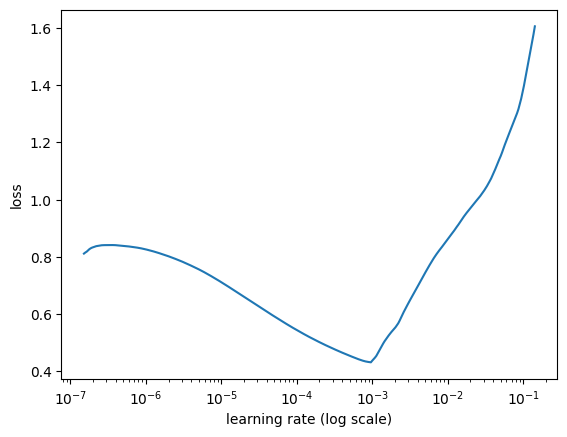

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fit and Save Model

In [ ]:
#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('/content/drive/My Drive/ColabData/bert-ch-marc')




begin training using onecycle policy with max lr of 2e-05...
221/221 [==============================] - 64s 203ms/step - loss: 0.1299 - accuracy: 0.9517 - val_loss: 0.0274 - val_accuracy: 0.9932


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation

In [ ]:
y_pred=predictor.predict(data_test['Reviews'].values)

In [ ]:
y_true = data_test['Sentiment'].values
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[72,  1],
       [ 0, 75]])

In [ ]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

     picture       1.00      0.99      0.99        73
        text       0.99      1.00      0.99        75

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148



In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9932432432432432

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

array([0.98630137, 1.        ])

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

array([1.        , 0.98684211])

In [ ]:
## AUC-ROC Curve
y_pred_proba = predictor.predict(data_test['Reviews'].values, return_proba=True)
print(predictor.get_classes()) # probability of each class
print(y_pred_proba[:5,])

['picture', 'text', nan]
[[1.3568415e-03 9.9831980e-01 3.2329586e-04]
 [9.9581271e-01 2.9560705e-03 1.2311389e-03]
 [9.9784398e-01 1.3477569e-03 8.0822280e-04]
 [9.9704933e-01 1.9447693e-03 1.0058831e-03]
 [2.6520356e-04 9.9950528e-01 2.2951346e-04]]


## Prediction and Deployment

In [ ]:
#sample dataset to test on

data = ['描述建筑设计的方法',
        "论述古代罗马建筑中的“公共浴场”设计",
        "描述一座现代办公大楼的工作氛围",
        "设计一个传统日式庭院的别墅建筑",
        "设计一个有顶的亭子",
        "为我描述民用建筑高度有何相关规范",
        ""]


In [ ]:
predictor.predict(data)

['text', 'text', 'text', 'picture', 'picture', 'text', 'text']

In [ ]:
#return_proba = True means it will give the prediction probabilty for each class

predictor.predict(data, return_proba=True)

array([[1.1519987e-02, 9.8240536e-01, 6.0746926e-03],
       [3.6491104e-04, 9.9896574e-01, 6.6941080e-04],
       [2.5381401e-01, 7.3433006e-01, 1.1855911e-02],
       [9.9559844e-01, 3.1691073e-03, 1.2324502e-03],
       [9.9545360e-01, 3.6021252e-03, 9.4428833e-04],
       [5.0695399e-03, 9.9201888e-01, 2.9115113e-03],
       [2.3837893e-01, 7.5082064e-01, 1.0800433e-02]], dtype=float32)

In [ ]:
#classes available

predictor.get_classes()

['picture', 'text', nan]

In [ ]:
## zip for furture deployment
# !zip -r /content/bert.zip /content/bert

## Deploy Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import ktrain
from ktrain import text

In [ ]:
# #loading the model

predictor_load = ktrain.load_predictor('/content/drive/My Drive/ColabData/bert-ch-marc')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
data = "你好，帮我绘制一本建筑蓝图"

In [ ]:
# #predicting the data

predictor_load.predict(data)

'picture'